Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [26]:
%matplotlib inline

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

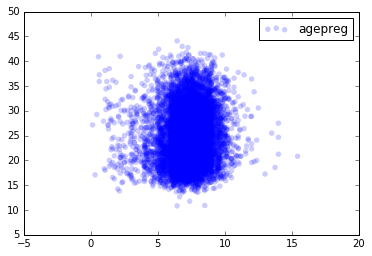

Percentiles of Total Birth Weight vs Age of Mother
Pearson Correlation: 0.0688339703541
Spearman Correlation: 0.0946100410966


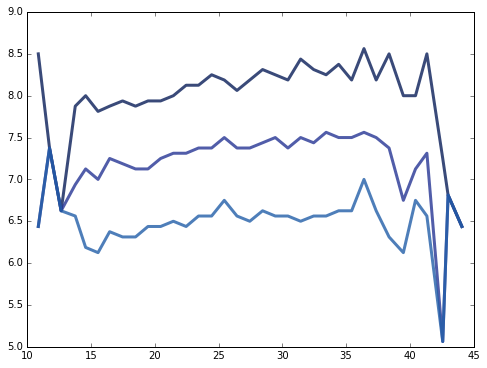

In [27]:
import nsfg
import thinkplot 
import numpy as np
import pandas as pd
import thinkstats2
%matplotlib inline
def CleanFemPreg(df):
    df.agepreg /= 100
    
    na_vals = [97,98,99]
    
    df.birthwgt_lb[df.birthwgt_lb > 20] = np.nan


initial = nsfg.ReadFemPreg()
preg = initial.dropna(subset=['agepreg','totalwgt_lb'])

b_wgt = preg.totalwgt_lb
m_age = preg.agepreg


thinkplot.Scatter(b_wgt, m_age,alpha=0.2)
thinkplot.Show()

bins = np.arange(5,50,1)
indices = np.digitize(preg.agepreg,bins)
groups = preg.groupby(indices)

m_age_2 = [group.agepreg.mean() for i, group in groups]
pregs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
print "Percentiles of Total Birth Weight vs Age of Mother"
for percent in [75,50,25]:
    b_wgt_prcnt = [cdf.Percentile(percent) for cdf in pregs]
    label = '%dth' %percent
    thinkplot.Plot(m_age_2, b_wgt_prcnt, label = label)

print 'Pearson Correlation: ' + str(thinkstats2.Corr(b_wgt,m_age))

print 'Spearman Correlation: ' + str(thinkstats2.SpearmanCorr(b_wgt,m_age))

<p> From the two graphs and the correlations we can see that the relationships between age and weight percent is 
not very linear in the majority of ages. From the scatter plot there seems to be very little correlation which is also shown by the near 0 value of Pearson's Correlation. From the graphs and Spearman's Correlation which is slightly higher which indicates that Pearson's Correlation is underestimating the data due to the non linearity of the relationship. In addition there are some outliers that are pulling the distributions. 
</p>